In [0]:
## Tutorial for MNIST

 Work through this tutorial to familiarize yourself with Pytorch basics: https://pytorch. org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial

In [0]:
import torch
import torchvision
from torchvision import transforms,datasets

In [6]:
train = datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [8]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
X,y = data[0][0],data[1][0]
print(y)

tensor(7)


In [0]:
import matplotlib.pyplot as plt


In [11]:
print(data[0][0].shape)



torch.Size([1, 28, 28])


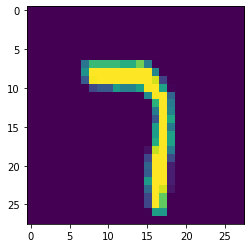

In [12]:
plt.imshow(data[0][0].view(28,28))

In [0]:
#check if dataset is balanced or not

total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}


In [14]:
for data in trainset:
  Xs,Ys = data
  for y in Ys:
    counter_dict[int(y)]+=1

print(counter_dict)

# Printing the count for digits in each class

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


 Work through this tutorial on MNIST starting from a Pytorch logistic regression and building to a CNN using torch.nn. Use a GPU (e.g. on Colab, through Google Cloud credits, Paperspace, or any other way). https://pytorch.org/tutorials/beginner/nn_tutorial. html 

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,64) # input is 784 and output is 64
    self.fc2 = nn.Linear(64,64) # input is 64 and output is 64
    self.fc3 = nn.Linear(64,64) # input is 64 and output is 64
    self.fc4 = nn.Linear(64,10) # input is 64 and output is 10

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x,dim=1)



net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(),lr=0.001) #net.parameters() 

EPOCHS = 3 # Number of passes through dataset is 3 times

for epoch in range(EPOCHS):
   for data in trainset: #data is batch of featureset and labels(target)
      X,y = data
      net.zero_grad()
      output = net(X.view(-1,28*28))
      loss = F.nll_loss(output,y)
      loss.backward()
      optimizer.step() #adjust the weights
   print(loss)




tensor(0.3192, grad_fn=<NllLossBackward>)
tensor(0.0139, grad_fn=<NllLossBackward>)
tensor(0.1862, grad_fn=<NllLossBackward>)


In [18]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X,y = data
    output = net(X.view(-1,28*28))
    for idx,i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct +=1
      total +=1
print("Accuracy is:" , round(correct/total,3))

Accuracy is: 0.981


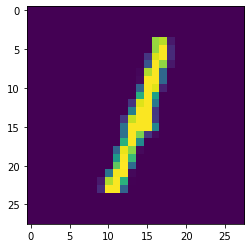

In [19]:
# cross check the output

plt.imshow(X[3].view(28,28)) #input value
plt.show()

In [20]:
print(torch.argmax(net(X[3].view(-1,28*28))[0])) # output value

tensor(1)


Design the best CNN you can to get the best accuracy on MNIST. 

In [0]:
## Convolutional Networks Layer


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [0]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

CNN_network = Net()
optimizer = optim.SGD(CNN_network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [0]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(trainset.dataset) for i in range(n_epochs + 1)] 

In [0]:
def train(epoch):
  CNN_network.train()
  for batch_idx, (data, target) in enumerate(trainset):
    optimizer.zero_grad()
    output = CNN_network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(trainset.dataset),
        100. * batch_idx / len(trainset), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(trainset.dataset)))

In [0]:
def test():
  
  CNN_network.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in testset:
      output = CNN_network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()

  test_loss /= len(testset.dataset)
  test_losses.append(test_loss)

  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(testset.dataset),100. * correct / len(testset.dataset)))

In [29]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3119, Accuracy: 998/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.346882
Train Epoch: 1 [100/60000 (0%)]	Loss: 2.345551
Train Epoch: 1 [200/60000 (0%)]	Loss: 2.339135
Train Epoch: 1 [300/60000 (0%)]	Loss: 2.325838
Train Epoch: 1 [400/60000 (1%)]	Loss: 2.256958
Train Epoch: 1 [500/60000 (1%)]	Loss: 2.312315
Train Epoch: 1 [600/60000 (1%)]	Loss: 2.343183
Train Epoch: 1 [700/60000 (1%)]	Loss: 2.266672
Train Epoch: 1 [800/60000 (1%)]	Loss: 2.295871
Train Epoch: 1 [900/60000 (2%)]	Loss: 2.229008
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.302572
Train Epoch: 1 [1100/60000 (2%)]	Loss: 2.284226
Train Epoch: 1 [1200/60000 (2%)]	Loss: 2.292721
Train Epoch: 1 [1300/60000 (2%)]	Loss: 2.299162
Train Epoch: 1 [1400/60000 (2%)]	Loss: 2.286520
Train Epoch: 1 [1500/60000 (2%)]	Loss: 2.192022
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.322766
Train Epoch: 1 [1700/60000 (3%)]	Loss: 2.222585
Train Epoch: 1 [1800/60000 (3%)]	Loss: 2.284937
Train Epoch: 1 [1900/60000 (3%)]	Loss: 2.35

CNN gives accuracy as follows:
Test set: Avg. loss: 0.0602, Accuracy: 9818/10000 (98%)

In [0]:
examples = enumerate(testset)
batch_idx, (example_data, example_targets) = next(examples)

In [33]:
example_data.shape

torch.Size([10, 1, 28, 28])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


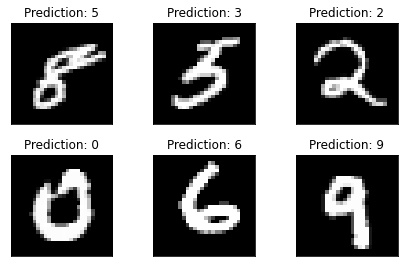

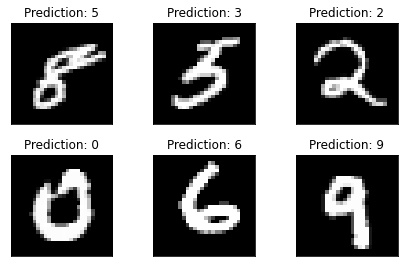

In [36]:
with torch.no_grad():
  output = CNN_network(example_data)


fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig